In [1]:
!mkdir -p JUND_TF/train
!mkdir -p JUND_TF/test
!mkdir -p JUND_TF/valid

## Download all necessary folders from [here](https://drive.google.com/drive/folders/1P7blSt-U-p4-SehKXegqGpLINaBVkSQi?usp=sharing) to `JUND_TF` folder. If you are using Google collabs. Then you should download all the files to `/content/JUND_TF` folder 

In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd

In [3]:
path = "/content/JUND_TF"
os.chdir(path)

In [5]:
!ls -lh *

test:
total 14M
-rw-r--r-- 1 root root  14M Dec 30 16:46 test_X.npy
-rw-r--r-- 1 root root 270K Dec 30 16:46 test_y.npy

train:
total 109M
-rw-r--r-- 1 root root 107M Dec 30 16:47 train_X.npy
-rw-r--r-- 1 root root 2.2M Dec 30 16:45 train_y.npy

valid:
total 6.3M
-rw-r--r-- 1 root root 6.0M Dec 30 16:45 valid_X.npy
-rw-r--r-- 1 root root 270K Dec 30 16:45 valid_y.npy


In [4]:
train_path = path + "/train"
valid_path = path + "/valid"
test_path = path + "/test"

In [5]:
print(train_path)
print(valid_path)
print(test_path)

/content/JUND_TF/train
/content/JUND_TF/valid
/content/JUND_TF/test


In [6]:
train = {}
with open(train_path+'/train_X.npy','rb') as f:
    train['X'] = np.load(f)
with open(train_path+'/train_y.npy', 'rb') as f:
    train['y'] = np.load(f)

In [7]:
valid = {}
with open(valid_path+'/valid_X.npy','rb') as f:
    valid['X'] = np.load(f)
with open(valid_path+'/valid_y.npy', 'rb') as f:
    valid['y'] = np.load(f)

In [8]:
test = {}
with open(test_path+'/test_X.npy','rb') as f:
    test['X'] = np.load(f)
with open(test_path+'/test_y.npy', 'rb') as f:
    test['y'] = np.load(f)

In [11]:
print(train['X'].shape, train['y'].shape)
print(test['X'].shape, test['y'].shape)
print(valid['X'].shape, valid['y'].shape)

(276216, 101, 4) (276216, 1)
(34528, 101, 4) (34528, 1)
(34527, 101, 4) (34527, 1)


In [12]:
# Distribution of classes in the train data
pd.DataFrame(train['y']).value_counts()

0    275048
1      1168
dtype: int64

In [14]:
train_features = train['X']
train_labels = train['y']

In [16]:
X = train['X'].reshape(train['X'].shape[0], -1)
X.shape

(276216, 404)

In [14]:
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Conv1D(filters=15, kernel_size = 10, padding="same", input_shape=(train['X'].shape[1], train['X'].shape[2])))
model.add(Dropout(0.5))
model.add(Conv1D(filters=15, kernel_size = 10, padding="same", input_shape=(train['X'].shape[1], train['X'].shape[2])))
model.add(Dropout(0.5))
model.add(Conv1D(filters=15, kernel_size = 10, padding="same", input_shape=(train['X'].shape[1], train['X'].shape[2])))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy', 'AUC'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 101, 15)           615       
                                                                 
 dropout (Dropout)           (None, 101, 15)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 101, 15)           2265      
                                                                 
 dropout_1 (Dropout)         (None, 101, 15)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 101, 15)           2265      
                                                                 
 dropout_2 (Dropout)         (None, 101, 15)           0         
                                                                 
 flatten (Flatten)           (None, 1515)             

In [15]:
history = model.fit(x=train['X'], # feature matrix
                    y=train['y'], # target vector
                    validation_data=(valid['X'], valid['y']),
                    epochs=25)

Epoch 1/25
8632/8632 [==============================] - 154s 18ms/step - loss: 0.0305 - binary_accuracy: 0.9956 - auc: 0.5079 - val_loss: 0.0274 - val_binary_accuracy: 0.9958 - val_auc: 0.5170
Epoch 2/25
8632/8632 [==============================] - 149s 17ms/step - loss: 0.0287 - binary_accuracy: 0.9958 - auc: 0.5168 - val_loss: 0.0275 - val_binary_accuracy: 0.9958 - val_auc: 0.5014
Epoch 3/25
8632/8632 [==============================] - 148s 17ms/step - loss: 0.0285 - binary_accuracy: 0.9958 - auc: 0.5057 - val_loss: 0.0275 - val_binary_accuracy: 0.9958 - val_auc: 0.5017
Epoch 4/25
8632/8632 [==============================] - 147s 17ms/step - loss: 0.0284 - binary_accuracy: 0.9958 - auc: 0.4998 - val_loss: 0.0283 - val_binary_accuracy: 0.9958 - val_auc: 0.5092
Epoch 5/25
8632/8632 [==============================] - 142s 16ms/step - loss: 0.0282 - binary_accuracy: 0.9958 - auc: 0.5034 - val_loss: 0.0276 - val_binary_accuracy: 0.9958 - val_auc: 0.5000
Epoch 6/25
8632/8632 [=============

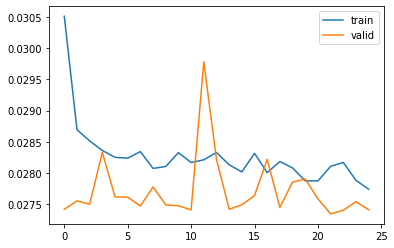

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=["train", "valid"])

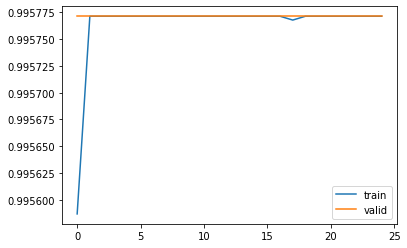

In [17]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.legend(labels=['train', 'valid'])

In [18]:
results_train = model.evaluate(train['X'], train['y'])
print('train loss, train acc, train auc:', results_train)

8632/8632 [==============================] - 41s 5ms/step - loss: 0.0273 - binary_accuracy: 0.9958 - auc: 0.5000
train loss, train acc, train auc: [0.02726268768310547, 0.9957714080810547, 0.4999854564666748]


In [19]:
results_test = model.evaluate(test['X'], test['y'], batch_size=128)
print("test loss, test acc, test auc:", results_test)

270/270 [==============================] - 4s 15ms/step - loss: 0.0274 - binary_accuracy: 0.9958 - auc: 0.5000
test loss, test acc, test auc: [0.027420099824666977, 0.9957715272903442, 0.5]
